<a href="https://www.kaggle.com/code/abrosimovamaria/11-kaggle?scriptVersionId=129558046" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten,Reshape
import random
from keras.models import Model
import keras.backend as K
import time
from keras.models import load_model
from tensorflow.keras import datasets, utils, applications, regularizers, optimizers

n = 'mnist'
num_classes = 10
x_train_buf_number = 60000
x_test_buf_number = 10000

In [2]:
def ReadBIN(n):
    print('Загрузка данных из двоичных файлов')
    with open('../input/mnist-dataset/mnistimagesTrain.bin', 'rb') as read_binary:
        img1 = np.fromfile(read_binary, dtype = np.uint8)
    with open('../input/mnist-dataset/mnistlabelsTrain.bin', 'rb') as read_binary:
        label1 = np.fromfile(read_binary, dtype = np.uint8)
    with open('../input/mnist-dataset/mnistimagesTest.bin', 'rb') as read_binary:
        img2 = np.fromfile(read_binary, dtype = np.uint8)
    with open( '../input/mnist-dataset/mnistlabelsTest.bin', 'rb') as read_binary:
        label2 = np.fromfile(read_binary, dtype = np.uint8)
    return img1, label1, img2, label2

def OutputData25(x, y):
    x_buf = x.copy()
    y_buf = y.copy()
    x_buf.reshape(-1, 28, 28, 1)
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        #random_index = random.randint(0, x_buf.shape[0] - 1)
        #print(random_index)
        #plt.imshow(x_buf.reshape(-1, 28, 28, 1)[random_index], cmap='gray')
        #plt.title(y_buf[random_index], size=12, weight="heavy")
        plt.title(y_buf[i], size=12, weight="heavy")
        plt.imshow(x_buf.reshape(-1, 28, 28, 1)[i], cmap='gray')
        
    plt.subplots_adjust(hspace=0.7)
    plt.show()
def buf_x_y(num_classes):
    buf = 0
    x_train = np.asarray(imagesTrain)
    y_train = np.asarray(labelsTrain)-buf
    x_test = np.asarray(imagesTest)
    y_test = np.asarray(labelsTest)-buf
    x_train = np.array(x_train, dtype='float32') / 255 #стандартизация
    x_test = np.array(x_test, dtype='float32') / 255
    # преобразование в вектор, размерность которого равна кол-ву классов задачи
    y_train_cat = keras.utils.to_categorical(y_train, num_classes)
    y_test_cat = keras.utils.to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test, y_train_cat, y_test_cat


number of classes:  10
Загрузка данных из двоичных файлов


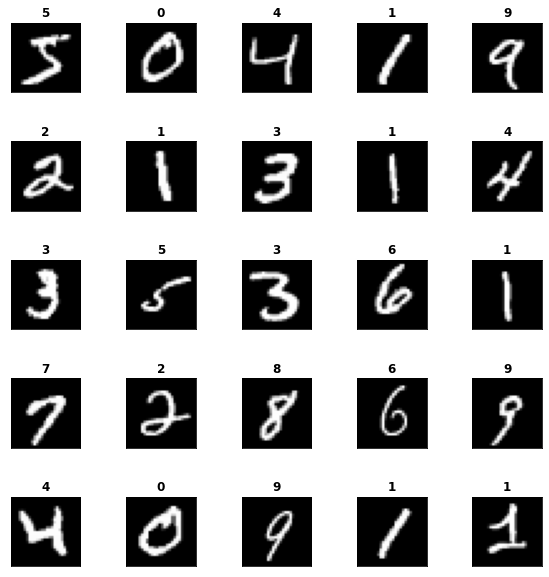

In [3]:
from PIL import Image
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
import cv2
import numpy as np

#загрузка MNIST
print("number of classes: ", num_classes)
imagesTrain, labelsTrain, imagesTest, labelsTest = ReadBIN(n)
x_train, y_train, x_test, y_test, y_train_cat, y_test_cat = buf_x_y(num_classes)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
OutputData25(x_train, y_train)

#3 канал
x_train = np.concatenate([x_train] * 3, axis=3)
x_test = np.concatenate([x_test] * 3, axis=3)

x_train /= 255
x_test /= 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#новый размер изображения 
IMG_SIZE = 48

(60000, 48, 48, 3)
(10000, 48, 48, 3)


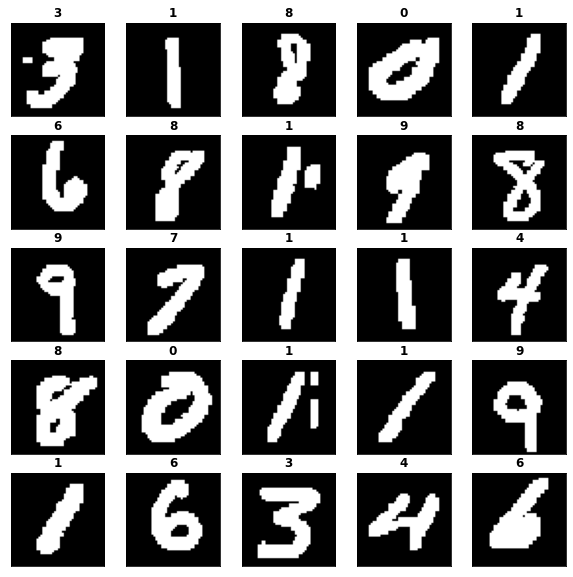

In [4]:
def OutputData48(x, y):
    x_buf = x.copy()
    y_buf = y.copy()
    x_buf.reshape(-1, IMG_SIZE, IMG_SIZE,3)
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        random_index = random.randint(0, x_buf.shape[0] - 10)#x_buf.shape[0] - 10
        #print(random_index)
        plt.imshow(x_buf.reshape(-1, IMG_SIZE, IMG_SIZE, 3)[random_index], cmap='gray')
        plt.title(y_buf[random_index], size=12, weight="heavy")


x_train = np.array([img_to_array(array_to_img(im).resize((IMG_SIZE,IMG_SIZE), resample=Image.BICUBIC)) for im in x_train])
x_test = np.array([img_to_array(array_to_img(im).resize((IMG_SIZE,IMG_SIZE), resample=Image.BICUBIC)) for im in x_test])

print(x_train.shape)
print(x_test.shape)
OutputData48(x_train, y_train )

In [5]:
from tensorflow.keras import applications
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
IMG_SIZE = 48
IMG_CHANNELS = 3
model_vgg16 = applications.VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE,IMG_CHANNELS))
#model_vgg16.summary()
#print("-------------------------------------------------------")

for layer in model_vgg16.layers[:-3]:
    layer.trainable = False

x = model_vgg16.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation = 'relu')(x)
#x = Dropout(0.2)(x)
#x = Dense(64, activation = 'relu')(x)
x = Dropout(0.2)(x)
output = Dense(10, activation = 'softmax')(x)

model = Model(inputs = model_vgg16.input, outputs = output)

# Компиляция модели
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [6]:
start = time.time() 
history = model.fit(x_train, y_train_cat, validation_split=0.2, epochs=10, batch_size=512)#
print('Время :', time.time() - start)
history_buf1 = history.history

#WriteHistorytoTextFile(history_buf1)
fn_model2 = 'lk3.h5'
model.save(fn_model2)

Epoch 1/10
94/94 [==============================] - 21s 119ms/step - loss: 0.2340 - accuracy: 0.9299 - val_loss: 1.0794 - val_accuracy: 0.7383
Epoch 2/10
94/94 [==============================] - 8s 81ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.1268 - val_accuracy: 0.9587
Epoch 3/10
94/94 [==============================] - 8s 82ms/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 0.1503 - val_accuracy: 0.9542
Epoch 4/10
94/94 [==============================] - 8s 81ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.2218 - val_accuracy: 0.9357
Epoch 5/10
94/94 [==============================] - 8s 81ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.1388 - val_accuracy: 0.9603
Epoch 6/10
94/94 [==============================] - 8s 81ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0885 - val_accuracy: 0.9721
Epoch 7/10
94/94 [==============================] - 8s 81ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0966 - val_accuracy: 0.9739
Epoch 8/10


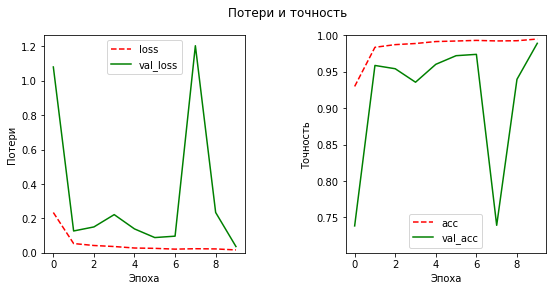

In [7]:

def one_plot(n, y_lb, loss_acc, val_loss_acc):
    plt.subplot(1, 2, n)
    if n == 1:
        lb, lb2 = 'loss', 'val_loss'
        yMin = 0
        yMax = 1.05 * max(max(loss_acc), max(val_loss_acc))
    else:
        lb, lb2 = 'acc', 'val_acc'
        yMin = min(min(loss_acc), min(val_loss_acc))
        yMax = 1.0
    plt.plot(loss_acc, color = 'r', label = lb, linestyle = '--')
    plt.plot(val_loss_acc, color = 'g', label = lb2)
    plt.ylabel(y_lb)
    plt.xlabel('Эпоха')
    plt.ylim([0.95 * yMin, yMax])
    plt.legend()
def BuildPlot(history):
    plt.figure(figsize=(9, 4))
    plt.subplots_adjust(wspace=0.5)
    one_plot(1, 'Потери', history['loss'], history['val_loss'])
    one_plot(2, 'Точность', history['accuracy'], history['val_accuracy'])
    plt.suptitle('Потери и точность')
    plt.show()


BuildPlot(history.history)



Прогноз 
Потери при тестировании: 0.037
Точность при тестировании: 98.89000058174133%
Всего изображений в тестовой выборке:  10000
Число верно классифицированных изображений:  9889
Точность: 98.89%
Неверно классифицированно: 111
Индекс  | Прогноз  |  Правильный класс
8         6         5
175         1         7
184         3         8
247         2         4
266         0         8
320         8         9
321         7         2
445         0         6
447         9         4
557         2         7
583         7         2
593         8         9
646         4         2
659         1         2


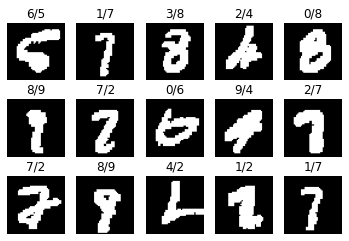

Точность по классам
0 :  0.996938775510204
1 :  1.0
2 :  0.9903100775193798
3 :  0.996039603960396
4 :  0.9867617107942973
5 :  0.9831838565022422
6 :  0.9926931106471816
7 :  0.9737354085603113
8 :  0.9835728952772074
9 :  0.979187314172448


In [8]:
def predictMNIST(n_test, predicted_classes, true_classes, m, lst_false, m_max, false_classified, model, number_model):
    print('Индекс  | Прогноз  |  Правильный класс')
    for i in range(n_test):  #
        cls_pred = predicted_classes[i]  # Предсказанное моделью имя класса
        cls_true = true_classes[i]  # Истинное имя класса
        if cls_pred != cls_true:
            m += 1
            lst_false.append([i, cls_pred, cls_true])
            if (m == min(m_max, false_classified)): break
            print("%-i%10i%10i" % (i, cls_pred, cls_true))
    #plt.figure('Ошибки классификации в модели {:.i%} ' .format(number_model))
    plt.figure("Ошибки классификации. Модель %d" % (number_model))
    for k in range(len(lst_false)):
        plt.subplot(3, 5, k + 1)
        lst = lst_false[k]
        plt.imshow(x_test[lst[0]].reshape(IMG_SIZE, IMG_SIZE,3), cmap='gray')
        plt.title('{}/{}'.format(lst[1], lst[2]))
        plt.axis('off')
    plt.show()
    print("Точность по классам")
    for i in range(num_classes):
        predictions = model.predict(x_test[y_test == i])
        n = sum(np.round(predictions[:, i]) == 1)
        print(i, ": ", n / sum(y_test == i))
        
def Forecast(fn_model_x):
    model = load_model(fn_model_x)
    score = model.evaluate(x_test, y_test_cat, verbose = 0)
    # Вывод потерь и точности
    print('Потери при тестировании:', round(score[0], 4))
    print('Точность при тестировании: {}{}'.format(score[1] * 100, '%'))
    # Прогноз
    y_pred = model.predict(x_test) #метки классов, предсказанных моделью НС
    predicted_classes = np.array([np.argmax(m) for m in y_pred])
    true_classes = np.array([np.argmax(m) for m in y_test_cat])
    n_test = len(y_test)
    print("Всего изображений в тестовой выборке: ", n_test)
    true_classified = np.sum(predicted_classes == true_classes)
    print("Число верно классифицированных изображений: ", true_classified)
    false_classified = n_test - true_classified
    acc = 100.0 * true_classified / n_test
    print('Точность: {}{}'.format(acc, '%'))
    print('Неверно классифицированно:', false_classified)
    m, m_max = 0, 15
    lst_false = []
    i = 0
    predictMNIST(n_test, predicted_classes, true_classes, m, lst_false, m_max, false_classified, model, 2)

print("Прогноз ")
Forecast(fn_model2)
exit()
